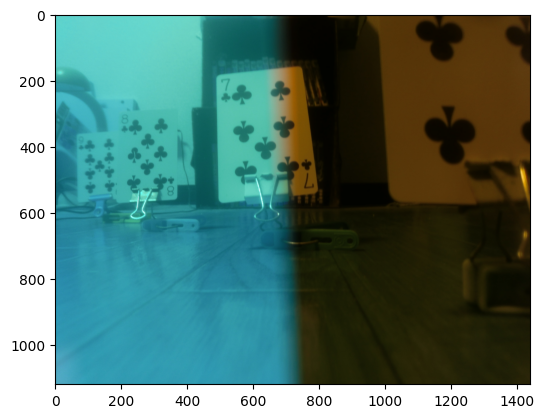

r


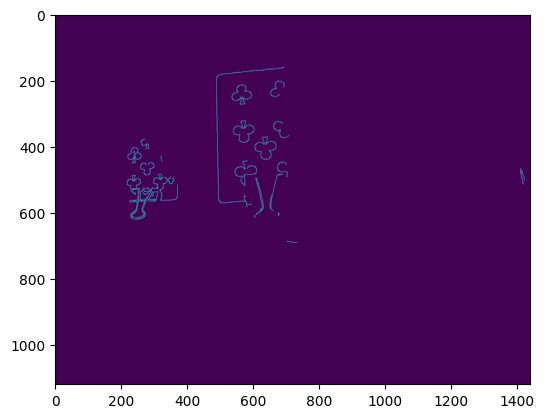

g


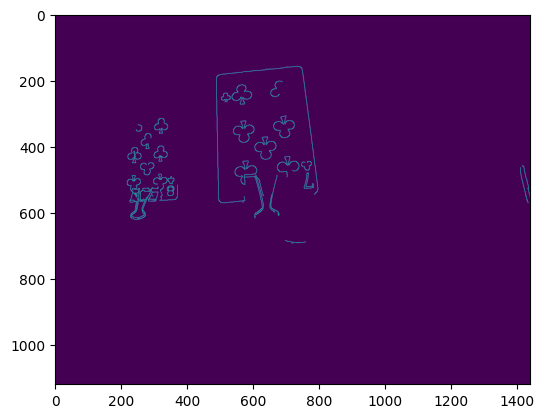

b


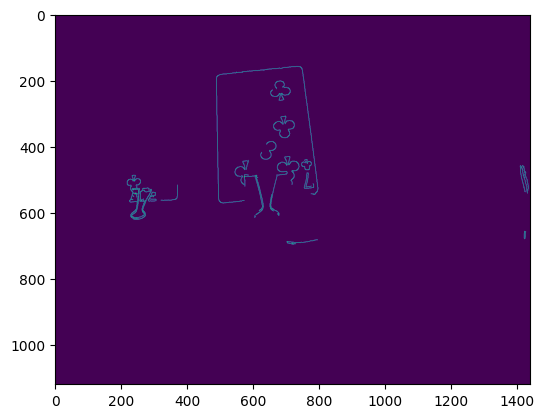

(1120, 1440) (1120, 1440) (1120, 1440)


ValueError: operands could not be broadcast together with shapes (4922,2) (6964,2) 

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def detect_edges(image):
    """Detect edges in the image using the Canny edge detector."""
    edges = cv2.Canny(image, 50, 200)
    return edges

def calculate_displacement(edges_r, edges_g, edges_b):
    """Calculate the displacement between edges in different color channels."""
    # Find the non-zero coordinates in each edge image
    coords_r = np.column_stack(np.where(edges_r > 0))
    coords_g = np.column_stack(np.where(edges_g > 0))
    coords_b = np.column_stack(np.where(edges_b > 0))
    
    # Calculate the mean displacement between the edges
    displacement_rg = np.mean(np.sqrt(np.sum((coords_r - coords_g)**2, axis=1)))
    displacement_rb = np.mean(np.sqrt(np.sum((coords_r - coords_b)**2, axis=1)))
    displacement_gb = np.mean(np.sqrt(np.sum((coords_g - coords_b)**2, axis=1)))
    
    return displacement_rg, displacement_rb, displacement_gb

def play(image_path):
    # Load the image
    image = cv2.imread(image_path)
    image = cv2.resize(image, (1440, 1120))
    plt.imshow(image),plt.show()
    if image is None:
        print("Error: Could not load image.")
        return

    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Detect edges in the grayscale image
    edges = detect_edges(gray)
    
    # Separate the color channels
    b, g, r = cv2.split(image)
    
    # Detect edges in each color channel
    edges_r = detect_edges(r)
    edges_g = detect_edges(g)
    edges_b = detect_edges(b)
    print("r")
    plt.imshow(edges_r),plt.show()
    print("g")
    plt.imshow(edges_g),plt.show()
    print("b")
    plt.imshow(edges_b),plt.show()
    print(edges_r.shape, edges_g.shape, edges_b.shape)
    # Calculate the displacement between the edges in different color channels
    displacement_rg, displacement_rb, displacement_gb = calculate_displacement(edges_r, edges_g, edges_b)
    
    print(f"Displacement between red and green edges: {displacement_rg:.2f} pixels")
    print(f"Displacement between red and blue edges: {displacement_rb:.2f} pixels")
    print(f"Displacement between green and blue edges: {displacement_gb:.2f} pixels")
    
    # Display the edges
    plt.figure(figsize=(10, 10))
    plt.subplot(2, 2, 1)
    plt.title('Original Image')
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.subplot(2, 2, 2)
    plt.title('Edges (Grayscale)')
    plt.imshow(edges, cmap='gray')
    plt.subplot(2, 2, 3)
    plt.title('Red Edges')
    plt.imshow(edges_r, cmap='gray')
    plt.subplot(2, 2, 4)
    plt.title('Green Edges')
    plt.imshow(edges_g, cmap='gray')
    plt.show()

# Run the main function with the path to your image
image_path = 't2.JPG'

play(image_path)